# Neural Networks for Data Science Applications
## Second Homework: Experimenting with modularity in deep learning

**Name**: *Davide Mascolo*

**Matricola**: *2001991*

> ✍ Upload the completed notebook **at least two days prior** to the exam's date on Google Classroom. For example, for the January call (25/01/2023), the final deadline is **23/01/2023 at 23:59** (GMT+1).

**Overview**: The homework is composed of three parts: (i) selecting a dataset and training a standard neural network (<ins>4 points</ins>); (ii) implementing a modular architecture (either an early-exit model or a mixture-of-experts model) and testing it (<ins>6 points</ins>); (iii) implementing a load balancing regularization (ONLY if you did not upload the 1st homework or if you want to improve your mark, </ins>5 points</ins>).

**IMPORTANT - read carefully before starting**:

> 🟨 *External material*: if you use any external material or inspiration for the code, reference it *explicitly* in the corresponding cell. For the textual descriptions, copy-paste *is not allowed*. <ins>Not following these two points is an immediate 0 mark</ins>.

> 🔵 *Grammar*: for the textual descriptions, I will remove points for too many grammatical or textual errors. Please try to be precise and provide nice-to-read descriptions, like if you were writing a report.

> 🟥 *Vectorization and TensorFlow*: like for the first homework, this must be done fully in TensorFlow and vectorizing the code as much as possible (e.g., do not loop explicitly over the batch dimension).

> 🟪 *Math*: you can also use LaTeX in Markdown if you need to write equations or if you need generic math notation.

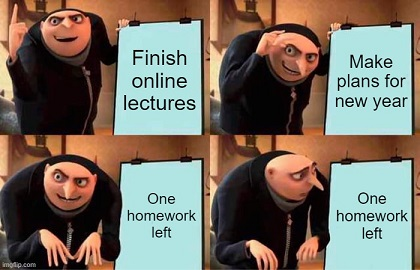

In [ ]:
import tensorflow as tf

### Warm-up: Selecting a dataset

During the course, we were able to see only a small selection of datasets. For this homework, you are free to select any dataset that you believe interesting (images, audios, texts, graphs)...

A few repositories that you can look at:

1. The catalog of [TensorFlow Datasets](https://www.tensorflow.org/datasets/).
2. The [Kaggle catalog](https://www.kaggle.com/data). For downloading data from Kaggle on Google Colab, you will need to [load your Kaggle authentication token](https://colab.research.google.com/github/corrieann/kaggle/blob/master/kaggle_api_in_colab.ipynb).
3. The [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets.php).
4. The [🤗 HuggingFace Datasets](https://huggingface.co/docs/datasets/) repository.

You are not bound to these; any open repository is okay. As a rule of thumb, the choice of dataset will not influence the mark (with few exceptions, see below), so you can select a complexity that you believe adequate to your skills.

🟩 **Please do:**

1. Provide a complete description of the dataset and the task below.
2. You are not limited to classification tasks. However, tasks that were not seen during the course (e.g., segmentation) **must be thoroughly explained in the text**.
3. Data preprocessing should be done as much as possible in `tf.data`.

🟥 **Please don't:**

1. Absolutely do not use datasets that were seen during our lab sessions.
2. Do not use MNIST, CIFAR-10, CIFAR-100, or any simple variation (e.g., Fashion MNIST).

✍ **DESCRIPTION OF THE CODE**

*Provide a small description of the dataset below (e.g., source, task, bibliographic reference if necessary...), both as text and in the comments of the code.*

**TODO**: add description here (1-2 paragraphs).

### Dataset
The detection of **weather conditions** is an important factor that is considered for various decisions. There are many fields where this problem is applied, such as autonomous vehicle driving, intelligent transport systems and sensing systems. The manual classification of these images takes a lot of time and for this reason Image Recognition techniques are often used to speed up the process.

The dataset used is [**Weather Classification**](https://www.kaggle.com/datasets/vijaygiitk/multiclass-weather-dataset) and it is composed by 5 different classes of weather  real life images. It contains about 1500 labelled images for the following classes:

0 - Cloudy

1 - Foggy

2 - Rainy

3 - Shine

4 - Sunrise

This type of application is very important and it's possible to find related works in the following links:

- [**Deep Learning-Based Weather Image Recognition**](https://ieeexplore.ieee.org/abstract/document/8644946?casa_token=7YMbT6EQLrIAAAAA:1XMACzQIpdtbC_epQZnCD_ChfOv-0DMBTA-qc4oBHWRSEwXG1VayqUQMMQHeUXjCsG65EcCv)

- [**Classification of Weather Phenomenon From Images by Using Deep Convolutional Neural Network**](https://agupubs.onlinelibrary.wiley.com/doi/full/10.1029/2020EA001604)

In this first phase, the dataset from kaggle was imported and various **Exploratory Analysis** and **Data Wrangling** operations were carried out.

In [ ]:
## Install kaggle
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
## Install Tensorflow Addons
!pip install tensorflow_addons

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 21.5 MB/s eta 0:00:00


In [ ]:
## Create an API Token from our kaggle account
## Upload kaggle.json to your Colab runtime

from google.colab import files
uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name = fn, length = len(uploaded[fn])))
  
## Then move kaggle.json into the folder where the API expects to find it.
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json
User uploaded file "kaggle.json" with length 69 bytes


In [ ]:
## Download the dataset
!kaggle datasets download "vijaygiitk/multiclass-weather-dataset"

 96% 129M/134M [00:01<00:00, 110MB/s] 
100% 134M/134M [00:01<00:00, 80.2MB/s]


In [ ]:
## Unzip
!unzip multiclass-weather-dataset.zip

Archive:  multiclass-weather-dataset.zip
  inflating: dataset/alien_test/Cloud_1.png  
  inflating: dataset/alien_test/Cloud_2.jpg  
  inflating: dataset/alien_test/Cloud_3.jpeg  
  inflating: dataset/alien_test/Cloud_4.jpg  
  inflating: dataset/alien_test/foggy_1.jpg  
  inflating: dataset/alien_test/foggy_10.jpg  
  inflating: dataset/alien_test/foggy_2.jpg  
  inflating: dataset/alien_test/foggy_3.jpg  
  inflating: dataset/alien_test/foggy_4.jpg  
  inflating: dataset/alien_test/foggy_5.jpg  
  inflating: dataset/alien_test/foggy_6.jpg  
  inflating: dataset/alien_test/foggy_7.jpg  
  inflating: dataset/alien_test/foggy_8.jpg  
  inflating: dataset/alien_test/foggy_9.jpg  
  inflating: dataset/alien_test/rain_1.jpg  
  inflating: dataset/alien_test/rain_2.png  
  inflating: dataset/alien_test/rain_3.jpg  
  inflating: dataset/alien_test/rain_4.jpg  
  inflating: dataset/alien_test/rain_5.jpg  
  inflating: dataset/alien_test/rain_6.jpg  
  inflating: dataset/alien_test/shine_1.jpg

In [ ]:
## Import utils
import os
import glob
import matplotlib.pyplot as plt
import timeit
from tqdm import *
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import tensorflow_addons as tfa
import shutil
from pathlib import Path
import warnings

warnings.filterwarnings("ignore")

In [ ]:
## Define paths to take data from folders and labels
path_train = "/content/dataset"
path_test = "/content/dataset/alien_test"
labels    = ["cloudy", "foggy", "rainy", "shine", "sunrise"]

In [ ]:
## Remove the test folder from the dataset (we will use it later)
shutil.move("/content/dataset/alien_test", "/content")

'/content/alien_test'

In [ ]:
## Check the number of images for each class
for label in labels:
    dir = os.path.join(path_train, label)
    print("Number of Images for " + label + ":\t", len(os.listdir(dir)))

print("---------------------------------------------")
print("Total number of Images" + ":\t", len(glob.glob(os.path.join(path_train, "*/*.jpg"))))

Number of Images for cloudy:	 300
Number of Images for foggy:	 300
Number of Images for rainy:	 300
Number of Images for shine:	 250
Number of Images for sunrise:	 350
---------------------------------------------
Total number of Images:	 1466


As we can see, the classes in the dataset are not unbalanced.

In [ ]:
## This function is used to visualize an image for each class
def image_show(path, target, num_images):
    """Input:  data paht, labels and number of images to visualize
       Output: number of images for each class"""

    ## Set Figsize
    plt.figure(figsize = (15, 10))
    ## Cycle for each label
    for label in range(len(target)):
        ## Save the path for each class
        dir = os.path.join(path, target[label])
        ## Save tot. "num_images" defined above for each class
        for i in range(num_images):
            img_path = os.path.join(dir, os.listdir(dir)[i])
            img = plt.imread(img_path)
        
            plt.subplot(len(target), num_images, label*num_images + i + 1)
            plt.imshow(img)
        
            ## Set the name of classes along y axis
            if i == 0:
                plt.ylabel(labels[label], fontsize = 20)

    plt.setp(plt.gcf().get_axes(), xticks = [], yticks = []);
    plt.tight_layout()

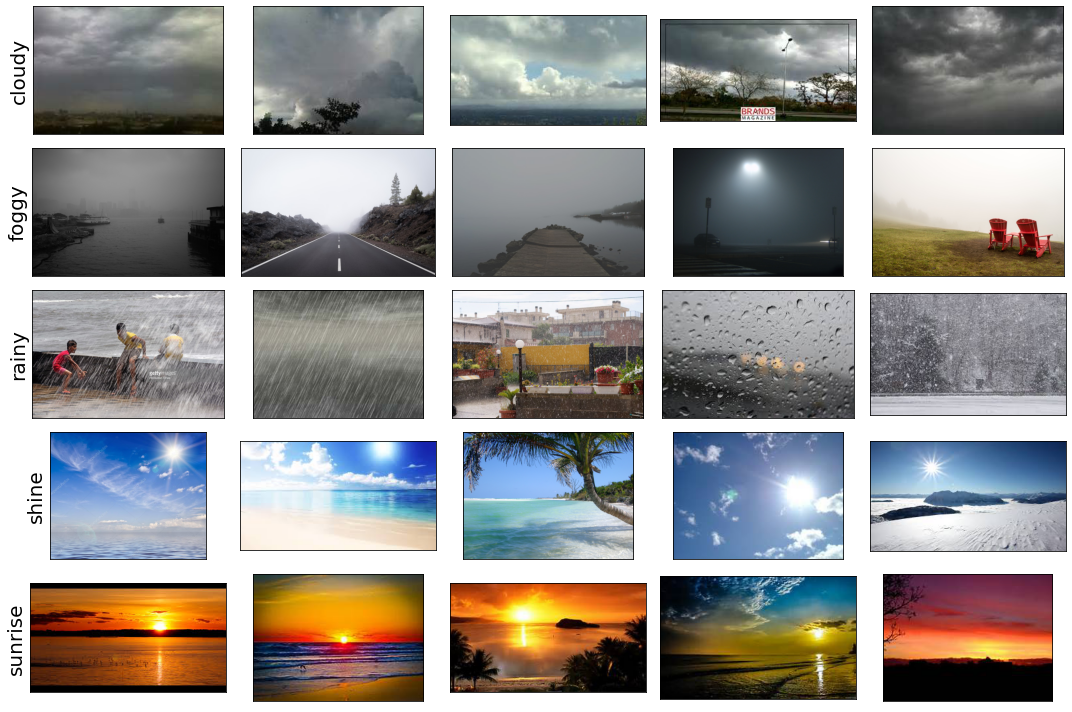

In [ ]:
## Plot 5 images for each class
image_show(path_train, labels, 5)

In [ ]:
## Define some important parameters to import data

## Set the batch size, and the size of the image
batch_size = 32
img_width  = 64
img_height = 64

## In this chunk we split the data
## Training Data
X_train = tf.keras.utils.image_dataset_from_directory(
    path_train,                           ## Path Train
    image_size = (img_width, img_height), ## Image Size
    subset = "training",                  ## Training
    validation_split = 0.3,               ## % training set = 100% - % validation split 
    seed = 123,                           ## Set seed
    label_mode = "categorical"
)

print("-----------------------------------------")

## Validation Data
X_val = tf.keras.utils.image_dataset_from_directory(
    path_train,                           ## Path Train
    image_size = (img_width, img_height), ## Image Size
    subset = "validation",                ## Validation
    validation_split = 0.3,               ## % validation split 
    seed = 123       ,                    ## Set seed
    label_mode = "categorical"     

)

## After several attempts and combining different data augmentation techniques,
## it was decided not to apply it as the performances do not improve.

## Save the number of classes
num_classes = 5

Found 1500 files belonging to 5 classes.
Using 1050 files for training.
-----------------------------------------
Found 1500 files belonging to 5 classes.
Using 450 files for validation.


### Exercise 1: Train on your data (4 points)

This part is straightforward: create a model, according to everything we saw in the course, and train it on the data you have loaded. You are free to use any components that were not included in the course (layers, losses, metrics, ...), provided you give a brief description below.

🟧 You will have to modify this model for Exercise 2, so consider carefully your choice here.

✍ **DESCRIPTION OF THE CODE**

*Provide a small description of (i) the model, (ii) the task, (iii) any notable features of your training process.*

**TODO**: add description here (1-2 paragraphs).

The network defined below consists of three layers plus the output layer. Each layer consists of:

- 2D convolution
- Batch Normalization
- ReLU Function
- Max Pool

The final layer is composed by two Dense layers of 512 and 256 neurons interspersed by Dropout and connected to the 5 output neurons (one for each class to be provided) and managed by the softamx function.

In [ ]:
# TODO: add the model definition and model training code here (as many cells as you need).

## Initialize the network
model = tf.keras.Sequential([
    ## First Layer
    tf.keras.layers.Conv2D(kernel_size = (7, 7) ,filters = 16, padding = "same",
                           input_shape = (img_width, img_height, 3)),           ## Convolution 2D
    tf.keras.layers.BatchNormalization(),                                       ## Batch Normalization
    tf.keras.layers.ReLU(),                                                     ## ReLU Function
    tf.keras.layers.MaxPool2D(pool_size = (2, 2)),                              ## Max Pool

    ## Second Layer
    tf.keras.layers.Conv2D(kernel_size = (5, 5) ,filters = 32, padding = "same"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.ReLU(),
    tf.keras.layers.MaxPool2D(pool_size = (2, 2)),

    ## Third Layer
    tf.keras.layers.Conv2D(kernel_size = (3, 3) ,filters = 64, padding = "same"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.ReLU(),
    tf.keras.layers.MaxPool2D(pool_size = (2, 2)),

    ## Output Layer
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation = "relu"),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(256, activation = "relu"),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(num_classes, activation = "softmax")
])

To compile the model, the following parameters are defined:

- Number of Epochs
- Categorical Cross Entropy as Loss Function
- Adam Optimizer
- Accuracy, Precision, Recall and F1 Score

Furthermore, it was used the **Model Checkpoint** to save the model with the best validation loss and also the **Early Stopping** technique in order to avoid the overfitting.

In [ ]:
## Define the metrics
metrics = ["accuracy",
           tf.keras.metrics.Precision(name = "Precision"),
           tf.keras.metrics.Recall(name = "Recall"),
           tfa.metrics.F1Score(num_classes = num_classes, threshold = 0.5)]

## Compile the model
model.compile(loss = "categorical_crossentropy",
              optimizer = "adam",
              metrics = metrics)

## Choose the number of epochs
num_epochs = 50

## Save the best model and use the early stopping to avoid overfitting
checkpoint  = tf.keras.callbacks.ModelCheckpoint("model.h5", monitor = "val_loss", save_best_only = True, mode = "min", verbose = 1)
early_stop  = tf.keras.callbacks.EarlyStopping(monitor = "val_loss", mode = "min", patience = 10)
reduce_lr   = tf.keras.callbacks.ReduceLROnPlateau(monitor = "val_loss", factor = 0.3, patience = 5, min_delta = 0.05,
                                                   mode = "auto", verbose = 1)

In [ ]:
## Select GPU device
device = tf.test.gpu_device_name()
print("Current device", device)

Current device /device:GPU:0


In [ ]:
## Train the model
start = timeit.default_timer()

## Fit
history_model = model.fit(X_train, epochs = num_epochs, verbose = 1,
                          batch_size = batch_size, callbacks = [checkpoint, early_stop, reduce_lr], validation_data = X_val)

stop = timeit.default_timer()
print("Computational Time:", stop - start)

Epoch 1/50


Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


33/33 [==============================] - ETA: 0s - loss: 2.6729 - accuracy: 0.4095 - Precision: 0.4325 - Recall: 0.3752 - f1_score: 0.3848
Epoch 1: val_loss improved from inf to 9.93614, saving model to model.h5
33/33 [==============================] - 18s 120ms/step - loss: 2.6729 - accuracy: 0.4095 - Precision: 0.4325 - Recall: 0.3752 - f1_score: 0.3848 - val_loss: 9.9361 - val_accuracy: 0.3956 - val_Precision: 0.4018 - val_Recall: 0.3956 - val_f1_score: 0.2728 - lr: 0.0010
Epoch 2/50
29/33 [=========================>....] - ETA: 0s - loss: 1.0799 - accuracy: 0.6228 - Precision: 0.7122 - Recall: 0.5226 - f1_score: 0.5839
Epoch 2: val_loss improved from 9.93614 to 3.47208, saving model to model.h5
33/33 [==============================] - 5s 132ms/step - loss: 1.0625 - accuracy: 0.6229 - Precision: 0.7115 - Recall: 0.5238 - f1_score: 0.5859 - val_loss: 3.4721 - val_accuracy: 0.4778 - val_Precision: 0.4852 - val_Recall: 0.4733 - val_f1_score: 0.3682 - lr: 0.0010
Epoch 3/50
30/33 [======

✍ **RESULTS**

*Provide below any metrics or plots that you think are interesting to show that the model was trained correctly. Explain them in code or in text, equivalently.*

In order to evaluate the model, we consider the following metrics:

- $Accuracy = \frac{TP + TN}{TP + TN + FP + FN}$

- $Recall = \frac{TP}{TP + FN}$

- $Precision = \frac{TP}{TP + FP}$

- $F1_{score} = 2 * \frac{Precision * Recall}{Precision + Recall}$

In [ ]:
## Training
train_loss      = history_model.history["loss"]
train_accuracy  = history_model.history["accuracy"]
train_precision = history_model.history["Precision"]
train_recall    = history_model.history["Recall"]

## Validation
val_loss      = history_model.history["val_loss"]
val_accuracy  = history_model.history["val_accuracy"]
val_precision = history_model.history["val_Precision"]
val_recall    = history_model.history["val_Recall"]

In the following plots we can observe the behavior of the model with respect to the reference metrics for the various epochs and the behavior of the loss functions.

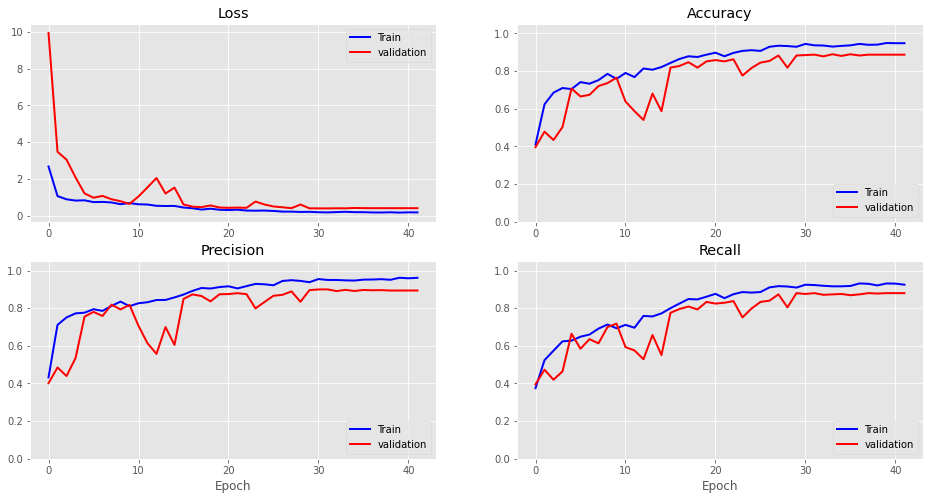

In [ ]:
plt.style.use("ggplot")
plt.figure(figsize = (16, 8))

## Loss Plot
plt.subplot(221)
## Train
plt.plot(train_loss, color = "blue", label = "Train", linewidth = 2)
## Validation
plt.plot(val_loss, color = "red", label = "validation", linewidth = 2)
plt.title("Loss")
plt.xlabel("")
plt.legend(loc = "upper right")

## Accuracy Plot
plt.subplot(222)
## Train
plt.plot(train_accuracy, color = "blue", label = "Train", linewidth = 2)
## Validation
plt.plot(val_accuracy, color = "red", label = "validation", linewidth = 2)
plt.ylim(0, 1.05)
plt.title("Accuracy")
plt.xlabel("")
plt.legend(loc = "lower right")

## Precision Plot
plt.subplot(223)
## Train
plt.plot(train_precision, color = "blue", label = "Train", linewidth = 2)
## Validation
plt.plot(val_precision, color = "red", label = "validation", linewidth = 2)
plt.ylim(0, 1.05)
plt.title("Precision")
plt.xlabel("Epoch")
plt.legend(loc = "lower right")

## Recall Plot
plt.subplot(224)
## Train
plt.plot(train_recall, color = "blue", label = "Train", linewidth = 2)
## Validation
plt.plot(val_recall, color = "red", label = "validation", linewidth = 2)
plt.ylim(0, 1.05)
plt.title("Recall")
plt.xlabel("Epoch")
plt.legend(loc = "lower right")

plt.show()

As expected, the training loss trend has less variability and tends to zero faster, but the validation loss also has a decreasing trend, probably increasing the epochs or trying with a set of different parameters could improve performance.

Furthermore, the metrics show less variability after the first 20 training epochs. This indicates that performance tends to be "more stable" around certain values.

Now, in order to evaluate the model on the test set it's useful to make different pre-processing operations.

##### Pre-processing for Test Data

In [ ]:
!mkdir Testing

## Create folder Test set
from pathlib import Path
Path("/content/Testing/cloudy").mkdir(parents = True, exist_ok = True)
Path("/content/Testing/foggy").mkdir(parents = True, exist_ok = True)
Path("/content/Testing/rainy").mkdir(parents = True, exist_ok = True)
Path("/content/Testing/shine").mkdir(parents = True, exist_ok = True)
Path("/content/Testing/sunrise").mkdir(parents = True, exist_ok = True)

In [ ]:
## Moving the test images in their respective folders of Testing Set
path_alien_test = "/content/alien_test"

## Cloud Images
res = [i for i in os.listdir(path_alien_test) if i.startswith("Cloud_")]
for i in res:
  shutil.move(os.path.join(path_alien_test, i), "/content/Testing/cloudy")

## Foggy Images
res = [i for i in os.listdir(path_alien_test) if i.startswith("foggy_")]
for i in res:
  shutil.move(os.path.join(path_alien_test, i), "/content/Testing/foggy")

## Rainy Images
res = [i for i in os.listdir(path_alien_test) if i.startswith("rain_")]
for i in res:
  shutil.move(os.path.join(path_alien_test, i), "/content/Testing/rainy")

## Shine Images
res = [i for i in os.listdir(path_alien_test) if i.startswith("shine_")]
for i in res:
  shutil.move(os.path.join(path_alien_test, i), "/content/Testing/shine")

# Sunrise Images
res = [i for i in os.listdir(path_alien_test) if i.startswith("sunrise_")]
for i in res:
  shutil.move(os.path.join(path_alien_test, i), "/content/Testing/sunrise")

## Remove directory
shutil.rmtree(path_alien_test)

#### Prediction

In this section the model that minimizes the validation loss is used as the best model to make the forecasts.

In [ ]:
## Load model
best_model = tf.keras.models.load_model("model.h5")

In [ ]:
## Path Test
path_test = "/content/Testing"

X_test = tf.keras.utils.image_dataset_from_directory(
    path_test,                            ## Path test
    image_size = (img_width, img_height), ## Image Size
    validation_split = 0,                 ## Testing
    seed = 123,                           ## Set seed
    label_mode = "categorical"
)

Found 30 files belonging to 5 classes.


In [ ]:
## Evaluate on Test Set
best_model.evaluate(X_test)

1/1 [==============================] - 1s 536ms/step - loss: 0.7018 - accuracy: 0.7333 - Precision: 0.7333 - Recall: 0.7333 - f1_score: 0.6963


[0.7018424868583679,
 0.7333333492279053,
 0.7333333492279053,
 0.7333333492279053,
 array([0.25      , 0.625     , 0.9230769 , 0.75      , 0.93333334],
       dtype=float32)]

In [ ]:
## Prediction
y_soft = best_model.predict(X_test)
y_pred = tf.argmax(y_soft, axis = 1) 

## Save Y test
for step, (X_batch_test, Y_batch_test) in enumerate(X_test):
  y_test = tf.argmax(Y_batch_test, axis = 1)

1/1 [==============================] - 0s 264ms/step


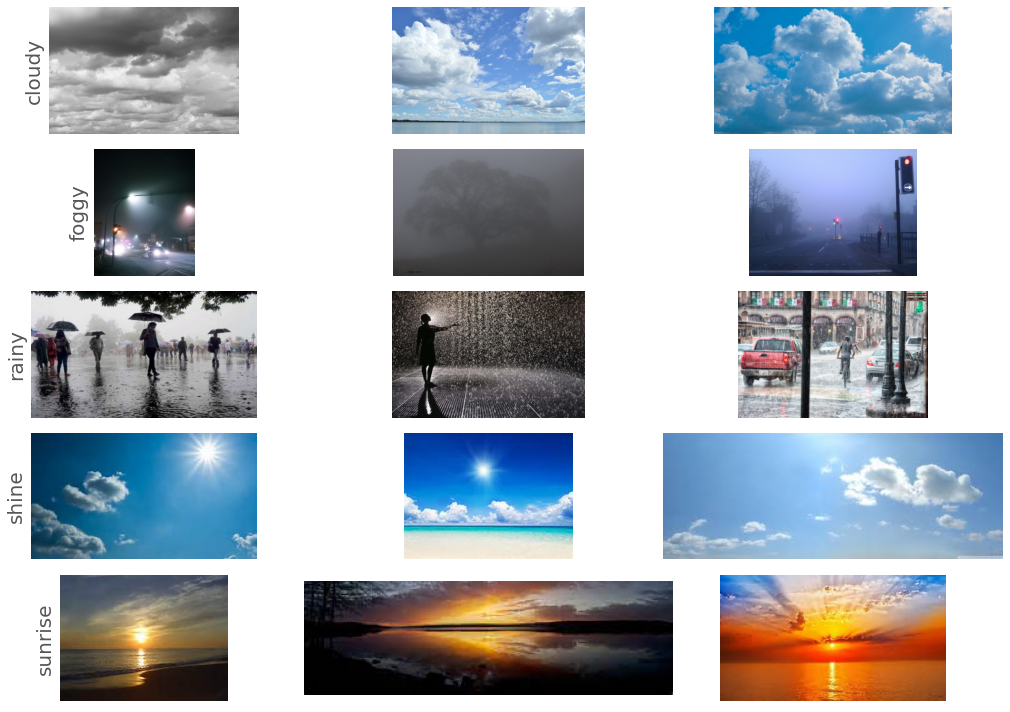

In [ ]:
## Visualize some test images
image_show(path_test, labels, 3)

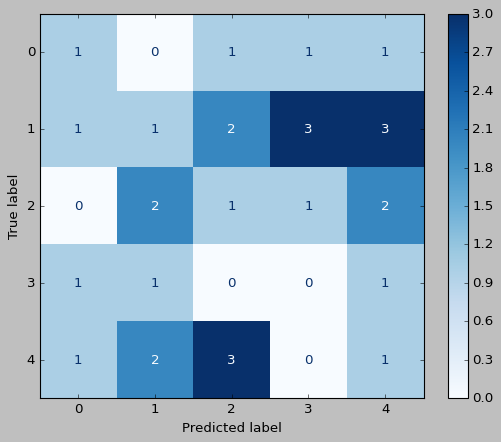

In [ ]:
## Confusion Matrix
plt.style.use("classic")

## Confusion Matrix Plot 
cm_cnn      = confusion_matrix(y_test, y_pred)
cm_cnn_plot = ConfusionMatrixDisplay(cm_cnn)
cm_cnn_plot.plot(values_format = "g", cmap = "Blues")

In [ ]:
## For reference
X_test.class_names

['cloudy', 'foggy', 'rainy', 'shine', 'sunrise']

The performances obtained on the test set are not excellent, indeed there is confusion between the different classes. To understand the reasons for misclassifications, one could view the results of intermediate convolutions or use techniques such as Grad-CAM heat-maps to identify erroneous areas of emphasis by our models.

Probably having a test set with more images would help, considering that the images unseen during training are also quite "complex".
In fact, as can be seen from the previous plot, for the **cloudy** class there are still images that represent clouds but also a sunny sky which could cause the model to be confused with the **shine** class. Similarly, some images in the class **rainy** for example also contain other components that could create difficulties in classification.

For future work it is definitely recommended to select more data for the training set, try different pre-processing techniques, different parameters and consider the model defined above as a benchmark to compare with pre-trained networks.

### Exercise 2 (6 points): Adding modularity to the network

The purpose of this second exercise is to implement a "modular" network, in the sense we discussed in class. In particular, two variants are allowed for this exercise (<ins>only one variant should be implemented</ins>):

1.   **Variant 2a, Early-exits**: Modify the model in Exercise 1 by adding 2 or more early exits and train it.
2.   **Variant 2b, Mixture-of-experts**: Modify the model in Exercise 1 by replacing at least one layer of the model with a MoE layer.

🟩 You are free to design the model as much as you want: you can follow the slides directly (e.g., summing the losses of all early exits during training), or you can follow some of the bibliographic references in the slides, or even any other paper you find online (e.g., the MoE model may route single tokens, entire images, with different routing mechanisms, etc.).

🟥 **Please don't:**

1. Copy-paste from the web (immediate zero mark).

✍ **DESCRIPTION OF THE CODE**

*Provide a complete description of the model (what you implemented, bibliographic references, how you are training it, notable implementation issues, etc.).*

**TODO**: add a complete description here (2-3 paragraphs).

In this second task the goal is to build a modular network using the early exit variant.

In [ ]:
# TODO: add all code here, using as many cells as you need. Train the new model.

## In order to implement Early Exit, it's useful define a new class starting from the model defined above.
## The model is defined in the class and it's divided in two different parts: backbone (initial model) and a basic classifier used to manage the early exits
## Exits is a list used to define the different level for the early exits.
## The idea is to iterate on the model and we are in self.exits, means that we exit from the model. This process is done when the flag Training is True (for the training part)
## For the inference part, we check if the confidence is greater with respect to a threshold and if this condition is true, we return directly the value.

class EarlyExit(tf.keras.Model):
    def __init__(self, threshold, exits, num_classes = 5):
        super(EarlyExit, self).__init__()
        self.threshold = threshold
        self.exits = exits
        self.loss_fn = tf.keras.losses.CategoricalCrossentropy()
        self.my_layers =  tf.keras.Sequential([
            ## First Layer
            tf.keras.layers.Conv2D(kernel_size = (7, 7) ,filters = 16, padding = "same",
                                input_shape = (img_width, img_height, 3)),          
            tf.keras.layers.BatchNormalization(),                                       
            tf.keras.layers.ReLU(),                                                     
            tf.keras.layers.MaxPool2D(pool_size = (2, 2)),                              

            ## Second Layer
            tf.keras.layers.Conv2D(kernel_size = (5, 5) ,filters = 32, padding = "same"),
            tf.keras.layers.BatchNormalization(),
            tf.keras.layers.ReLU(),
            tf.keras.layers.MaxPool2D(pool_size = (2, 2)),

            ## Third Layer
            tf.keras.layers.Conv2D(kernel_size = (3, 3) ,filters = 64, padding = "same"),
            tf.keras.layers.BatchNormalization(),
            tf.keras.layers.ReLU(),
            tf.keras.layers.MaxPool2D(pool_size = (2, 2)),

            ## Output Layer
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(512, activation = "relu"),
            tf.keras.layers.Dropout(0.5),
            tf.keras.layers.Dense(256, activation = "relu"),
            tf.keras.layers.Dropout(0.5),
            tf.keras.layers.Dense(num_classes, activation = "softmax")])

        self.classifiers = [tf.keras.Sequential([
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(num_classes, activation = "softmax")]) for _ in exits] ## Basic Classifier

    def call(self, inputs, training = None, labels = None):
        '''Input: Images, Training Flag, Labels
           Output: Output model'''

        ## Empty lists to save results
        outputs = []
        cnt = 0

        ## Cycle on the list of layers
        x = inputs
        for i, layer in enumerate(self.my_layers.layers):
            x = layer(x)
            if i in self.exits:
                output = self.classifiers[cnt](x) ## If we are in the self.exit layers, run only the basic classifier
                outputs.append(output)
                
                if training == False:
                    if tf.math.reduce_max(output, axis = 1) > self.threshold: ## If the confidence is greater w.r.t. the threshold, stop the training
                        return output
                cnt += 1

            if i == 17:
                outputs.append(x)

        return outputs

In [ ]:
## Call the class
exit_model = EarlyExit(exits = [4, 8, 12], threshold = 0.5)

In [ ]:
## Define optimizer, number of epochs (best, using the Early Stopping in the point 1) and cross entropy loss
optimizer = tf.keras.optimizers.Adam()
epochs    = 30
cce       = tf.keras.losses.CategoricalCrossentropy()

## Define some useful functions
## 3 different early exits
loss_metric = tf.keras.metrics.Mean()
final_acc   = tf.keras.metrics.CategoricalAccuracy()
ee1_acc     = tf.keras.metrics.CategoricalAccuracy()
ee2_acc     = tf.keras.metrics.CategoricalAccuracy()
ee3_acc     = tf.keras.metrics.CategoricalAccuracy()

## Define list in which to save the partial accuracies for Early Exit
losses_list = []
final_accs  = []
ee1_accs    = []
ee2_accs    = []
ee3_accs    = []

## Define the loss function as the sum of the partial ones
def personal_loss(y_true, y_pred):
  loss_1 = cce(y_true, y_pred[0])
  loss_2 = cce(y_true, y_pred[1])
  loss_3 = cce(y_true, y_pred[2])
  loss_model = cce(y_true, y_pred[-1])
  final_loss = loss_1 + loss_2 + loss_3 + loss_model
  return final_loss

In [ ]:
## Custom Training Loop

## Start training
start = timeit.default_timer()

## Epoch
for epoch in tqdm(range(epochs)):
    print("\nStart of epoch %d" % (epoch))
    ## Batch
    for step, (inputs, targets) in enumerate(X_train):
        with tf.GradientTape() as tape:
          ## Prediction
          outputs = exit_model(inputs, training = True)  
          ## Loss Function           
          loss = personal_loss(targets, outputs)
        ## Gradients    
        grads = tape.gradient(loss, exit_model.trainable_weights)
        optimizer.apply_gradients(zip(grads, exit_model.trainable_weights))

        ## Cross Entropy Loss
        final_loss = loss_metric(loss)
        ## Accuracy
        final_acc.update_state(targets, outputs[-1])
        ee1_acc.update_state(targets, outputs[0])
        ee2_acc.update_state(targets, outputs[1])
        ee3_acc.update_state(targets, outputs[2])

    ## Print Loss value and update the list
    print("Loss:" , float(loss_metric.result()))
    losses_list.append(loss_metric.result())

    ## Print the final accuracy and the accuracy for each Early Exit
    print("Final accuracy over epoch: %.4f" % (float(final_acc.result()),))
    print("Early Exit 1: accuracy over epoch: %.4f" % (float(ee1_acc.result()),))
    print("Early Exit 2: accuracy over epoch: %.4f" % (float(ee2_acc.result()),))
    print("Early Exit 3: accuracy over epoch: %.4f" % (float(ee3_acc.result()),))

    ## Update the lists
    final_accs.append(final_acc.result())
    ee1_accs.append(ee1_acc.result())
    ee2_accs.append(ee2_acc.result())
    ee3_accs.append(ee3_acc.result())

stop = timeit.default_timer()
print("Computational Time:", stop - start)

  0%|          | 0/30 [00:00<?, ?it/s]


Start of epoch 0


  3%|▎         | 1/30 [00:07<03:40,  7.59s/it]

Loss: 7.059637069702148
Final accuracy over epoch: 0.4476
Early Exit 1: accuracy over epoch: 0.5981
Early Exit 2: accuracy over epoch: 0.6267
Early Exit 3: accuracy over epoch: 0.6229

Start of epoch 1


  7%|▋         | 2/30 [00:11<02:34,  5.51s/it]

Loss: 5.229355812072754
Final accuracy over epoch: 0.5348
Early Exit 1: accuracy over epoch: 0.6643
Early Exit 2: accuracy over epoch: 0.6938
Early Exit 3: accuracy over epoch: 0.6881

Start of epoch 2


 10%|█         | 3/30 [00:15<02:08,  4.75s/it]

Loss: 4.362502098083496
Final accuracy over epoch: 0.5879
Early Exit 1: accuracy over epoch: 0.7133
Early Exit 2: accuracy over epoch: 0.7378
Early Exit 3: accuracy over epoch: 0.7244

Start of epoch 3


 13%|█▎        | 4/30 [00:20<02:05,  4.84s/it]

Loss: 3.771980047225952
Final accuracy over epoch: 0.6262
Early Exit 1: accuracy over epoch: 0.7490
Early Exit 2: accuracy over epoch: 0.7717
Early Exit 3: accuracy over epoch: 0.7562

Start of epoch 4


 17%|█▋        | 5/30 [00:24<01:52,  4.50s/it]

Loss: 3.336693525314331
Final accuracy over epoch: 0.6554
Early Exit 1: accuracy over epoch: 0.7770
Early Exit 2: accuracy over epoch: 0.7985
Early Exit 3: accuracy over epoch: 0.7865

Start of epoch 5


 20%|██        | 6/30 [00:28<01:43,  4.30s/it]

Loss: 3.0314297676086426
Final accuracy over epoch: 0.6768
Early Exit 1: accuracy over epoch: 0.7957
Early Exit 2: accuracy over epoch: 0.8162
Early Exit 3: accuracy over epoch: 0.8054

Start of epoch 6


 23%|██▎       | 7/30 [00:33<01:44,  4.56s/it]

Loss: 2.8165974617004395
Final accuracy over epoch: 0.6905
Early Exit 1: accuracy over epoch: 0.8107
Early Exit 2: accuracy over epoch: 0.8278
Early Exit 3: accuracy over epoch: 0.8184

Start of epoch 7


 27%|██▋       | 8/30 [00:37<01:35,  4.35s/it]

Loss: 2.6330251693725586
Final accuracy over epoch: 0.7029
Early Exit 1: accuracy over epoch: 0.8220
Early Exit 2: accuracy over epoch: 0.8404
Early Exit 3: accuracy over epoch: 0.8294

Start of epoch 8


 30%|███       | 9/30 [00:41<01:28,  4.20s/it]

Loss: 2.4608426094055176
Final accuracy over epoch: 0.7172
Early Exit 1: accuracy over epoch: 0.8328
Early Exit 2: accuracy over epoch: 0.8530
Early Exit 3: accuracy over epoch: 0.8404

Start of epoch 9


 33%|███▎      | 10/30 [00:46<01:28,  4.43s/it]

Loss: 2.3200104236602783
Final accuracy over epoch: 0.7306
Early Exit 1: accuracy over epoch: 0.8414
Early Exit 2: accuracy over epoch: 0.8617
Early Exit 3: accuracy over epoch: 0.8507

Start of epoch 10


 37%|███▋      | 11/30 [00:49<01:21,  4.26s/it]

Loss: 2.1793766021728516
Final accuracy over epoch: 0.7446
Early Exit 1: accuracy over epoch: 0.8507
Early Exit 2: accuracy over epoch: 0.8715
Early Exit 3: accuracy over epoch: 0.8616

Start of epoch 11


 40%|████      | 12/30 [00:53<01:14,  4.13s/it]

Loss: 2.0694468021392822
Final accuracy over epoch: 0.7533
Early Exit 1: accuracy over epoch: 0.8578
Early Exit 2: accuracy over epoch: 0.8798
Early Exit 3: accuracy over epoch: 0.8696

Start of epoch 12


 43%|████▎     | 13/30 [00:58<01:14,  4.38s/it]

Loss: 1.970931053161621
Final accuracy over epoch: 0.7620
Early Exit 1: accuracy over epoch: 0.8653
Early Exit 2: accuracy over epoch: 0.8861
Early Exit 3: accuracy over epoch: 0.8764

Start of epoch 13


 47%|████▋     | 14/30 [01:03<01:13,  4.60s/it]

Loss: 1.9018412828445435
Final accuracy over epoch: 0.7691
Early Exit 1: accuracy over epoch: 0.8686
Early Exit 2: accuracy over epoch: 0.8917
Early Exit 3: accuracy over epoch: 0.8810

Start of epoch 14


 50%|█████     | 15/30 [01:08<01:09,  4.64s/it]

Loss: 1.847166895866394
Final accuracy over epoch: 0.7767
Early Exit 1: accuracy over epoch: 0.8699
Early Exit 2: accuracy over epoch: 0.8966
Early Exit 3: accuracy over epoch: 0.8866

Start of epoch 15


 53%|█████▎    | 16/30 [01:12<01:02,  4.44s/it]

Loss: 1.7700859308242798
Final accuracy over epoch: 0.7843
Early Exit 1: accuracy over epoch: 0.8751
Early Exit 2: accuracy over epoch: 0.9014
Early Exit 3: accuracy over epoch: 0.8920

Start of epoch 16


 57%|█████▋    | 17/30 [01:16<00:55,  4.27s/it]

Loss: 1.6994835138320923
Final accuracy over epoch: 0.7919
Early Exit 1: accuracy over epoch: 0.8799
Early Exit 2: accuracy over epoch: 0.9060
Early Exit 3: accuracy over epoch: 0.8964

Start of epoch 17


 60%|██████    | 18/30 [01:21<00:53,  4.43s/it]

Loss: 1.6295956373214722
Final accuracy over epoch: 0.7993
Early Exit 1: accuracy over epoch: 0.8844
Early Exit 2: accuracy over epoch: 0.9105
Early Exit 3: accuracy over epoch: 0.9011

Start of epoch 18


 63%|██████▎   | 19/30 [01:25<00:46,  4.25s/it]

Loss: 1.5649412870407104
Final accuracy over epoch: 0.8053
Early Exit 1: accuracy over epoch: 0.8899
Early Exit 2: accuracy over epoch: 0.9141
Early Exit 3: accuracy over epoch: 0.9057

Start of epoch 19


 67%|██████▋   | 20/30 [01:28<00:41,  4.13s/it]

Loss: 1.5108516216278076
Final accuracy over epoch: 0.8105
Early Exit 1: accuracy over epoch: 0.8947
Early Exit 2: accuracy over epoch: 0.9171
Early Exit 3: accuracy over epoch: 0.9097

Start of epoch 20


 70%|███████   | 21/30 [01:33<00:39,  4.40s/it]

Loss: 1.4577010869979858
Final accuracy over epoch: 0.8160
Early Exit 1: accuracy over epoch: 0.8987
Early Exit 2: accuracy over epoch: 0.9206
Early Exit 3: accuracy over epoch: 0.9135

Start of epoch 21


 73%|███████▎  | 22/30 [01:37<00:34,  4.26s/it]

Loss: 1.4076647758483887
Final accuracy over epoch: 0.8208
Early Exit 1: accuracy over epoch: 0.9025
Early Exit 2: accuracy over epoch: 0.9239
Early Exit 3: accuracy over epoch: 0.9168

Start of epoch 22


 77%|███████▋  | 23/30 [01:41<00:29,  4.15s/it]

Loss: 1.3561550378799438
Final accuracy over epoch: 0.8262
Early Exit 1: accuracy over epoch: 0.9064
Early Exit 2: accuracy over epoch: 0.9271
Early Exit 3: accuracy over epoch: 0.9201

Start of epoch 23


 80%|████████  | 24/30 [01:46<00:26,  4.39s/it]

Loss: 1.3094403743743896
Final accuracy over epoch: 0.8313
Early Exit 1: accuracy over epoch: 0.9100
Early Exit 2: accuracy over epoch: 0.9300
Early Exit 3: accuracy over epoch: 0.9232

Start of epoch 24


 83%|████████▎ | 25/30 [01:50<00:21,  4.24s/it]

Loss: 1.2658286094665527
Final accuracy over epoch: 0.8358
Early Exit 1: accuracy over epoch: 0.9136
Early Exit 2: accuracy over epoch: 0.9328
Early Exit 3: accuracy over epoch: 0.9261

Start of epoch 25


 87%|████████▋ | 26/30 [01:54<00:16,  4.14s/it]

Loss: 1.2257498502731323
Final accuracy over epoch: 0.8403
Early Exit 1: accuracy over epoch: 0.9164
Early Exit 2: accuracy over epoch: 0.9352
Early Exit 3: accuracy over epoch: 0.9288

Start of epoch 26


 90%|█████████ | 27/30 [01:59<00:13,  4.38s/it]

Loss: 1.1869208812713623
Final accuracy over epoch: 0.8449
Early Exit 1: accuracy over epoch: 0.9192
Early Exit 2: accuracy over epoch: 0.9376
Early Exit 3: accuracy over epoch: 0.9313

Start of epoch 27


 93%|█████████▎| 28/30 [02:03<00:08,  4.24s/it]

Loss: 1.1503812074661255
Final accuracy over epoch: 0.8486
Early Exit 1: accuracy over epoch: 0.9220
Early Exit 2: accuracy over epoch: 0.9398
Early Exit 3: accuracy over epoch: 0.9337

Start of epoch 28


 97%|█████████▋| 29/30 [02:07<00:04,  4.11s/it]

Loss: 1.1158409118652344
Final accuracy over epoch: 0.8526
Early Exit 1: accuracy over epoch: 0.9245
Early Exit 2: accuracy over epoch: 0.9419
Early Exit 3: accuracy over epoch: 0.9359

Start of epoch 29


100%|██████████| 30/30 [02:12<00:00,  4.40s/it]

Loss: 1.0843173265457153
Final accuracy over epoch: 0.8563
Early Exit 1: accuracy over epoch: 0.9268
Early Exit 2: accuracy over epoch: 0.9438
Early Exit 3: accuracy over epoch: 0.9379
Computational Time: 132.117492637


At this point, we validate the model on the unseed data.

In [ ]:
## Import test data with batch size 1
X_test_one_batch = tf.keras.utils.image_dataset_from_directory(
    path_test,                            ## Path test
    image_size = (img_width, img_height), ## Image Size
    validation_split = 0,                 ## Testing
    seed = 123,                           ## Set seed
    label_mode = "categorical",
    batch_size = 1)

Found 30 files belonging to 5 classes.


In [ ]:
## Inference Time
test_acc = tf.keras.metrics.CategoricalAccuracy()
## Cycle
for step, (inputs, targets) in enumerate(X_test_one_batch):
  output = exit_model(inputs, training = False)
  test_acc.update_state(targets, output)

print("Accuracy on test set: %.4f" % (float(test_acc.result()),))
test_acc.reset_states()

Accuracy on test set: 0.6667


✍ **RESULTS AND EVALUATION**

*Provide below any metrics or plots that you think are interesting to show that the model was trained correctly (e.g., the average accuracy of each early exit). Explain them in code or in text, equivalently.*

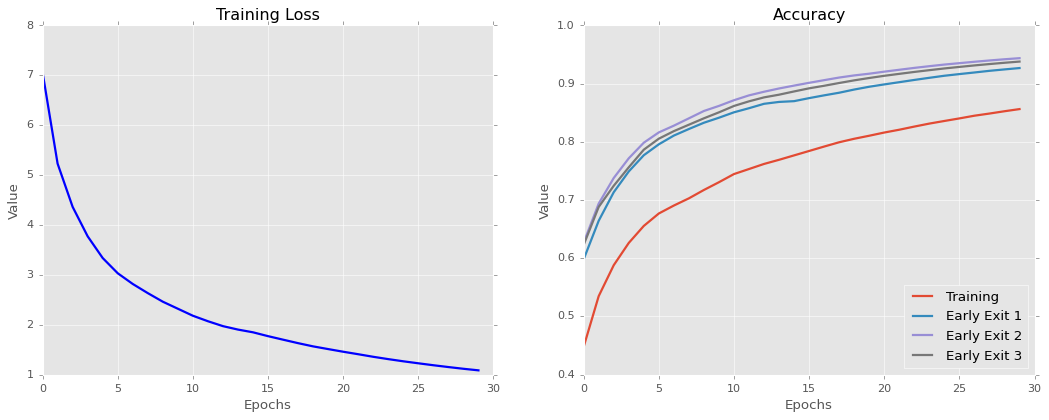

In [ ]:
# TODO: Add results here (anything appropriate is okay).

## Plot the average accuracy of each eatly exit
plt.style.use("ggplot")
plt.figure(figsize = (16, 12))

## Loss Plot
plt.subplot(221)
## Training Loss
plt.plot(losses_list, color = "blue", label = "Train", linewidth = 2)
plt.xlabel("Epochs")
plt.ylabel("Value")
plt.title("Training Loss")

## Accuracy Plot
plt.subplot(222)
## Train
plt.plot(final_accs,label = "Training", linewidth = 2)
plt.plot(ee1_accs, label = "Early Exit 1", linewidth = 2)
plt.plot(ee2_accs, label = "Early Exit 2", linewidth = 2)
plt.plot(ee3_accs, label = "Early Exit 3", linewidth = 2)
plt.xlabel("Epochs")
plt.ylabel("Value")
plt.title("Accuracy")
plt.legend(loc = "lower right")

plt.show()

It is possible to observe that we get the best values for Early Exit 2, this probably means that even if we exit at Early 2 we get good performances and using the complete network could probably lead to overfitting. However, the performances are not far from each other and a simpler classifier could probably be used without resorting to the Early Exit technique.